# COMP3850 - FX analysis

In [1]:
#data manipulation libraries
import pandas as pd
import numpy as np 

#data visualisation libraries
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
# import matplotlib as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from pandas.plotting import autocorrelation_plot
import plotly.express as px
import plotly.graph_objects as go

#stat models libraries 
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller#for augmented Dickey-Fuller test
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose


#sklearn predictive modelling
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

#technical analysis libaries
import talib as ta # Used to perform Technical analysis of financial market data

#others libraries 
import math
import datetime

#libaries to collect path for data extraction
import os
import glob

## Data Extraction

Extracting the given FX csv files and storing them within dataframes via Jupiter notebook

In [2]:
def data_extraction(curr):
    directory = os.getcwd()
    filepath = f"{directory}\FX"
    file_list = []
    for file in os.listdir(filepath):
        d = os.path.join(filepath, file)
        if os.path.isdir(d):
            file_list.append(d)
    dfs = []
    for d in file_list:
        csv_files = glob.glob(os.path.join(d, "*.csv"))
        for f in csv_files:
            if f'bar_Forex_{curr}' in f:
                df = pd.read_csv(f)
                dfs.append(df)
    final_df = pd.concat(dfs)
    return final_df

In [3]:
dfaudusd = data_extraction('AUDUSD')
dfeuraud = data_extraction('EURAUD')
dfeurgbp = data_extraction('EURGBP')
dfeurusd = data_extraction('EURUSD')
dfgbpusd = data_extraction('GBPUSD')

In [5]:
dfaudusd.head()

,date,bid_open,bid_high,bid_low,bid_close,bid_volume,bid_average,bid_barCount,ask_open,ask_high,ask_low,ask_close,ask_volume,ask_average,ask_barCount
0,2020-06-01 00:00:00+00:00,0.66582,0.66583,0.66581,0.66582,-1,-1.0,-1,0.66584,0.66586,0.66584,0.66586,-1,-1.0,-1
1,2020-06-01 00:00:01+00:00,0.66582,0.66582,0.66581,0.66581,-1,-1.0,-1,0.66586,0.66586,0.66584,0.66584,-1,-1.0,-1
2,2020-06-01 00:00:02+00:00,0.66581,0.66582,0.66581,0.66581,-1,-1.0,-1,0.66584,0.66586,0.66584,0.66586,-1,-1.0,-1
3,2020-06-01 00:00:03+00:00,0.66581,0.66582,0.66581,0.66582,-1,-1.0,-1,0.66586,0.66586,0.66586,0.66586,-1,-1.0,-1
4,2020-06-01 00:00:04+00:00,0.66582,0.66582,0.66582,0.66582,-1,-1.0,-1,0.66586,0.66586,0.66586,0.66586,-1,-1.0,-1


In [152]:
dfaudusd.shape

(9187200, 15)

In [66]:
#developed this function to grab specific FX pairing datasets (1st month at the moment) and store and combine the files into one dataframe per FX pairing
def extract_data(curr):
    data_list =[]
    # for i in range(202006,202010):
    for n in range(1,25):
        if(len(str(n)) == 1):
            if(n == 5):
                dat = pd.read_csv(f"FX/202006/bar_Forex_{curr}-2020060{n}T000000_2020060{n}T205959.csv")
            elif(n not in [6,7]):
                dat = pd.read_csv(f"FX/202006/bar_Forex_{curr}-2020060{n}T000000_2020060{n}T235959.csv")
            else:
                pass
        data_list.append(dat)
        if(n in [12,19,26]):
            dat = pd.read_csv(f"FX/202006/bar_Forex_{curr}-202006{n}T000000_202006{n}T205959.csv")
        elif(len(str(n)) == 2):
            if(n not in [13,14,20,21,27,28]):
                dat = pd.read_csv(f"FX/202006/bar_Forex_{curr}-202006{n}T000000_202006{n}T235959.csv")
    return pd.concat(data_list) 

In [3]:
#Might be useful for later (a list for each catergory) #not important at the moment
AUD_USD = 'AUDUSD'#, range(1,25), 5, [6,7], [12,19,26], [13,14,29,21,27,28]]
EUR_AUD = 'EURAUD'#, range(1,25), 5, [6,7], [12,19,26], [13,14,29,21,27,28]]
EUR_GBP = 'EURGBP'#, range(1,25), 5, [6,7], [12,19,26], [13,14,29,21,27,28]]
EUR_USD = 'EURUSD'#, range(1,25), 5, [6,7], [12,19,26], [13,14,29,21,27,28]]
GBP_USD = 'GBPUSD'#, range(1,25), 5, [6,7], [12,19,26], [13,14,29,21,27,28]]

In [153]:
dfaudusd.head()

,date,bid_open,bid_high,bid_low,bid_close,bid_volume,bid_average,bid_barCount,ask_open,ask_high,ask_low,ask_close,ask_volume,ask_average,ask_barCount
0,2020-06-01 00:00:00+00:00,0.66582,0.66583,0.66581,0.66582,-1,-1.0,-1,0.66584,0.66586,0.66584,0.66586,-1,-1.0,-1
1,2020-06-01 00:00:01+00:00,0.66582,0.66582,0.66581,0.66581,-1,-1.0,-1,0.66586,0.66586,0.66584,0.66584,-1,-1.0,-1
2,2020-06-01 00:00:02+00:00,0.66581,0.66582,0.66581,0.66581,-1,-1.0,-1,0.66584,0.66586,0.66584,0.66586,-1,-1.0,-1
3,2020-06-01 00:00:03+00:00,0.66581,0.66582,0.66581,0.66582,-1,-1.0,-1,0.66586,0.66586,0.66586,0.66586,-1,-1.0,-1
4,2020-06-01 00:00:04+00:00,0.66582,0.66582,0.66582,0.66582,-1,-1.0,-1,0.66586,0.66586,0.66586,0.66586,-1,-1.0,-1


In [67]:
#storing each dataframe with the function
dfaudusd = extract_data('AUDUSD')
dfeuraud = extract_data('EURAUD')
dfeurgbp = extract_data('EURGBP')
dfeurusd = extract_data('EURUSD')
dfgbpusd = extract_data('GBPUSD')
#display the 1st five records of the AUD-USD FX Pairing
dfaudusd.head()

,date,bid_open,bid_high,bid_low,bid_close,bid_volume,bid_average,bid_barCount,ask_open,ask_high,ask_low,ask_close,ask_volume,ask_average,ask_barCount
0,2020-06-01 00:00:00+00:00,0.66582,0.66583,0.66581,0.66582,-1,-1.0,-1,0.66584,0.66586,0.66584,0.66586,-1,-1.0,-1
1,2020-06-01 00:00:01+00:00,0.66582,0.66582,0.66581,0.66581,-1,-1.0,-1,0.66586,0.66586,0.66584,0.66584,-1,-1.0,-1
2,2020-06-01 00:00:02+00:00,0.66581,0.66582,0.66581,0.66581,-1,-1.0,-1,0.66584,0.66586,0.66584,0.66586,-1,-1.0,-1
3,2020-06-01 00:00:03+00:00,0.66581,0.66582,0.66581,0.66582,-1,-1.0,-1,0.66586,0.66586,0.66586,0.66586,-1,-1.0,-1
4,2020-06-01 00:00:04+00:00,0.66582,0.66582,0.66582,0.66582,-1,-1.0,-1,0.66586,0.66586,0.66586,0.66586,-1,-1.0,-1


In [125]:
dfaudusd.shape

(1962900, 15)

## Data Preparation

In [69]:
## change the name of 'date' field to datatime

In [126]:
#Determining the size of each dataframe (number of records, number of columns)
print(dfaudusd.shape, dfeuraud.shape, dfeurgbp.shape, dfeurusd.shape, dfgbpusd.shape)

(1962900, 15) (1962900, 15) (1962900, 15) (1962900, 15) (1962900, 15)


In [142]:
#display the datatypes of each column
dfaudusd.info()
# dfeuraud.info()
# dfeurgbp.info()
# dfeurusd.info()
# dfgbpusd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9187200 entries, 0 to 75599
Data columns (total 15 columns):
 #   Column        Dtype  
---  ------        -----  
 0   date          object 
 1   bid_open      float64
 2   bid_high      float64
 3   bid_low       float64
 4   bid_close     float64
 5   bid_volume    int64  
 6   bid_average   float64
 7   bid_barCount  int64  
 8   ask_open      float64
 9   ask_high      float64
 10  ask_low       float64
 11  ask_close     float64
 12  ask_volume    int64  
 13  ask_average   float64
 14  ask_barCount  int64  
dtypes: float64(10), int64(4), object(1)
memory usage: 1.1+ GB


In [143]:
#display descriptive statistics on AUD-USD pairings
dfaudusd.describe().round(3)

,bid_open,bid_high,bid_low,bid_close,bid_volume,bid_average,bid_barCount,ask_open,ask_high,ask_low,ask_close,ask_volume,ask_average,ask_barCount
count,9187200.000,9187200.000,9187200.000,9187200.000,9187200.0,9187200.0,9187200.0,9187200.000,9187200.000,9187200.000,9187200.000,9187200.0,9187200.0,9187200.0
mean,0.710,0.710,0.710,0.710,-1.0,-1.0,-1.0,0.710,0.710,0.710,0.710,-1.0,-1.0,-1.0
std,0.014,0.014,0.014,0.014,0.0,0.0,0.0,0.014,0.014,0.014,0.014,0.0,0.0,0.0
min,0.666,0.666,0.666,0.666,-1.0,-1.0,-1.0,0.666,0.666,0.666,0.666,-1.0,-1.0,-1.0
25%,0.697,0.697,0.697,0.697,-1.0,-1.0,-1.0,0.697,0.697,0.697,0.697,-1.0,-1.0,-1.0
50%,0.713,0.713,0.713,0.713,-1.0,-1.0,-1.0,0.713,0.713,0.713,0.713,-1.0,-1.0,-1.0
75%,0.719,0.719,0.719,0.719,-1.0,-1.0,-1.0,0.719,0.719,0.719,0.719,-1.0,-1.0,-1.0
max,0.741,0.741,0.741,0.741,-1.0,-1.0,-1.0,0.741,0.741,0.741,0.741,-1.0,-1.0,-1.0


In [129]:
dfeuraud.describe().round(3)

,bid_open,bid_high,bid_low,bid_close,bid_volume,bid_average,bid_barCount,ask_open,ask_high,ask_low,ask_close,ask_volume,ask_average,ask_barCount
count,1962900.000,1962900.000,1962900.000,1962900.000,1962900.0,1962900.0,1962900.0,1962900.000,1962900.000,1962900.000,1962900.000,1962900.0,1962900.0,1962900.0
mean,1.632,1.632,1.632,1.632,-1.0,-1.0,-1.0,1.632,1.632,1.632,1.632,-1.0,-1.0,-1.0
std,0.010,0.010,0.010,0.010,0.0,0.0,0.0,0.010,0.010,0.010,0.010,0.0,0.0,0.0
min,1.603,1.603,1.603,1.603,-1.0,-1.0,-1.0,1.603,1.603,1.603,1.603,-1.0,-1.0,-1.0
25%,1.626,1.626,1.626,1.626,-1.0,-1.0,-1.0,1.626,1.626,1.626,1.626,-1.0,-1.0,-1.0
50%,1.631,1.631,1.631,1.631,-1.0,-1.0,-1.0,1.631,1.631,1.631,1.631,-1.0,-1.0,-1.0
75%,1.638,1.638,1.638,1.638,-1.0,-1.0,-1.0,1.638,1.638,1.638,1.638,-1.0,-1.0,-1.0
max,1.669,1.669,1.669,1.669,-1.0,-1.0,-1.0,1.669,1.670,1.669,1.669,-1.0,-1.0,-1.0


In [16]:
#checking for nulls and the sum
print(f'Are there any null values in AUDUSD? {dfaudusd.isnull().values.any()}')
# print(f'Which fields have null values:\n{dfaudusd.isnull().sum()}')
print(f'Are there any null values in EUROAUD? {dfeuraud.isnull().values.any()}')
# print(f'Which fields have null values:\n{dfeuraud.isnull().sum()}')
print(f'Are there any null values in EUROGBP? {dfeurgbp.isnull().values.any()}')
# print(f'Which fields have null values:\n{dfeurgbp.isnull().sum()}')
print(f'Are there any null values EURUSD? {dfeurusd.isnull().values.any()}')
# print(f'Which fields have null values:\n{dfeurusd.isnull().sum()}')
print(f'Are there any null values GBPUSD? {dfgbpusd.isnull().values.any()}')
# print(f'Which fields have null values:\n{dfgbpusd.isnull().sum()}')

Are there any null values in AUDUSD? False
Are there any null values in EUROAUD? False
Are there any null values in EUROGBP? False
Are there any null values EURUSD? False
Are there any null values GBPUSD? False


### Extracting particular times of the day

In [156]:
dfs= [dfaudusd, dfeuraud, dfeurgbp, dfeurusd, dfgbpusd]
for i in range(len(dfs)):
    dfs[i][['Date', 'Time']] = dfs[i]['date'].str.split(' ', expand=True)
    dfs[i][['Time', 'Useless']]  = dfs[i]['Time'].str.split('+', expand=True)
dfaudusd.head()



,date,bid_open,bid_high,bid_low,bid_close,bid_volume,bid_average,bid_barCount,ask_open,ask_high,ask_low,ask_close,ask_volume,ask_average,ask_barCount,Date,Time,Useless
0,2020-06-01 00:00:00+00:00,0.66582,0.66583,0.66581,0.66582,-1,-1.0,-1,0.66584,0.66586,0.66584,0.66586,-1,-1.0,-1,2020-06-01,00:00:00,00:00
1,2020-06-01 00:00:01+00:00,0.66582,0.66582,0.66581,0.66581,-1,-1.0,-1,0.66586,0.66586,0.66584,0.66584,-1,-1.0,-1,2020-06-01,00:00:01,00:00
2,2020-06-01 00:00:02+00:00,0.66581,0.66582,0.66581,0.66581,-1,-1.0,-1,0.66584,0.66586,0.66584,0.66586,-1,-1.0,-1,2020-06-01,00:00:02,00:00
3,2020-06-01 00:00:03+00:00,0.66581,0.66582,0.66581,0.66582,-1,-1.0,-1,0.66586,0.66586,0.66586,0.66586,-1,-1.0,-1,2020-06-01,00:00:03,00:00
4,2020-06-01 00:00:04+00:00,0.66582,0.66582,0.66582,0.66582,-1,-1.0,-1,0.66586,0.66586,0.66586,0.66586,-1,-1.0,-1,2020-06-01,00:00:04,00:00


In [8]:
#don't execute if you have executed the above cell
dfaudusd[['Date', 'Time']] = dfaudusd['date'].str.split(' ', expand=True)
dfaudusd[['Time', 'Useless']]  = dfaudusd['Time'].str.split('+', expand=True)
dfaudusd.head()

,date,bid_open,bid_high,bid_low,bid_close,bid_volume,bid_average,bid_barCount,ask_open,ask_high,ask_low,ask_close,ask_volume,ask_average,ask_barCount,Date,Time,Useless
0,2020-06-01 00:00:00+00:00,0.66582,0.66583,0.66581,0.66582,-1,-1.0,-1,0.66584,0.66586,0.66584,0.66586,-1,-1.0,-1,2020-06-01,00:00:00,00:00
1,2020-06-01 00:00:01+00:00,0.66582,0.66582,0.66581,0.66581,-1,-1.0,-1,0.66586,0.66586,0.66584,0.66584,-1,-1.0,-1,2020-06-01,00:00:01,00:00
2,2020-06-01 00:00:02+00:00,0.66581,0.66582,0.66581,0.66581,-1,-1.0,-1,0.66584,0.66586,0.66584,0.66586,-1,-1.0,-1,2020-06-01,00:00:02,00:00
3,2020-06-01 00:00:03+00:00,0.66581,0.66582,0.66581,0.66582,-1,-1.0,-1,0.66586,0.66586,0.66586,0.66586,-1,-1.0,-1,2020-06-01,00:00:03,00:00
4,2020-06-01 00:00:04+00:00,0.66582,0.66582,0.66582,0.66582,-1,-1.0,-1,0.66586,0.66586,0.66586,0.66586,-1,-1.0,-1,2020-06-01,00:00:04,00:00


In [131]:
#check updated datatypes
dfaudusd.dtypes
# dfeuraud.dtypes
# dfeurgbp.dtypes
# dfeurusd.dtypes
# dfgbpusd.dtypes

date             object
bid_open        float64
bid_high        float64
bid_low         float64
bid_close       float64
bid_volume        int64
bid_average     float64
bid_barCount      int64
ask_open        float64
ask_high        float64
ask_low         float64
ask_close       float64
ask_volume        int64
ask_average     float64
ask_barCount      int64
Date             object
Time             object
Useless          object
dtype: object

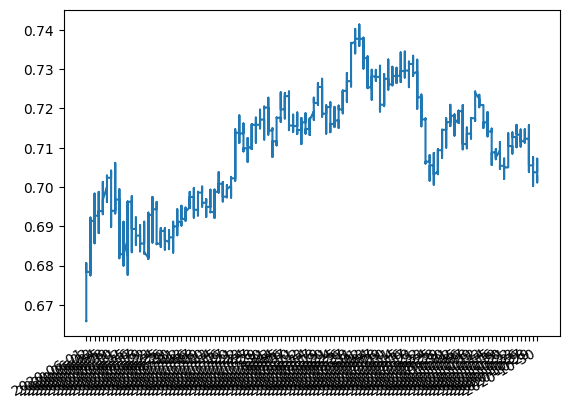

In [10]:
fig, ax = plt.subplots()
ax.plot(dfaudusd['Date'], dfaudusd['bid_open'])
fig.autofmt_xdate()


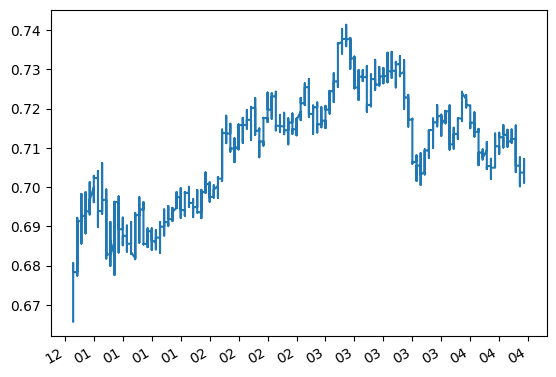

In [11]:
from matplotlib.dates import DateFormatter


fig, ax = plt.subplots()
ax.plot(dfaudusd['Date'], dfaudusd['bid_open'])
fig.autofmt_xdate()
#ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
date_form = DateFormatter("%m")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
#ax.set_title('Bid Open for AU/USD')

### Splitting the date field into th

In [37]:
#0 to 23 for each day
test= []
for i in range(0,24):
    test.append(dfaudusd[(dfaudusd['Time'].str.contains(f'{i}:00:00'))])
    # dfeuraudse = dfeuraud[(dfeuraud['Time'].str.contains('10:00:00')) | (dfeuraud['Time'].str.contains('16:00:00'))]
    # dfeurgbpse = dfeurgbp[(dfeurgbp['Time'].str.contains('10:00:00')) | (dfeurgbp['Time'].str.contains('16:00:00'))]
    # dfeurusdse = dfeurusd[(dfeurusd['Time'].str.contains('10:00:00')) | (dfeurusd['Time'].str.contains('16:00:00'))]
    # dfgbpusdse = dfgbpusd[(dfgbpusd['Time'].str.contains('10:00:00')) | (dfgbpusd['Time'].str.contains('16:00:00'))]
test_df = pd.concat(test)


In [52]:
hr_interval_df = test_df.sort_values(by=['date'], ascending=True).drop_duplicates()

In [53]:
hr_interval_df.shape

(2486, 18)

In [13]:
dfaudusdse = dfaudusd[(dfaudusd['Time'].str.contains('10:00:00')) | (dfaudusd['Time'].str.contains('16:00:00'))]
dfaudusdse.head()
# dfeuraudse = dfeuraud[(dfeuraud['Time'].str.contains('10:00:00')) | (dfeuraud['Time'].str.contains('16:00:00'))]
# # dfeuraudse.head()
# dfeurgbpse = dfeurgbp[(dfeurgbp['Time'].str.contains('10:00:00')) | (dfeurgbp['Time'].str.contains('16:00:00'))]
# # dfeurgbpse.head()
# dfeurusdse = dfeurusd[(dfeurusd['Time'].str.contains('10:00:00')) | (dfeurusd['Time'].str.contains('16:00:00'))]
# # dfeurusdse.head()
# dfgbpusdse = dfgbpusd[(dfgbpusd['Time'].str.contains('10:00:00')) | (dfgbpusd['Time'].str.contains('16:00:00'))]
# # dfgbpusdse.head()


,date,bid_open,bid_high,bid_low,bid_close,bid_volume,bid_average,bid_barCount,ask_open,ask_high,ask_low,ask_close,ask_volume,ask_average,ask_barCount,Date,Time,Useless
36000,2020-06-01 10:00:00+00:00,0.67288,0.67289,0.67288,0.67289,-1,-1.0,-1,0.67292,0.67292,0.67292,0.67292,-1,-1.0,-1,2020-06-01,10:00:00,00:00
57600,2020-06-01 16:00:00+00:00,0.67849,0.67849,0.67845,0.67847,-1,-1.0,-1,0.67850,0.67850,0.67846,0.67848,-1,-1.0,-1,2020-06-01,16:00:00,00:00
36000,2020-06-02 10:00:00+00:00,0.68663,0.68663,0.68662,0.68662,-1,-1.0,-1,0.68666,0.68666,0.68666,0.68666,-1,-1.0,-1,2020-06-02,10:00:00,00:00
57600,2020-06-02 16:00:00+00:00,0.68716,0.68717,0.68714,0.68717,-1,-1.0,-1,0.68718,0.68719,0.68716,0.68718,-1,-1.0,-1,2020-06-02,16:00:00,00:00
36000,2020-06-03 10:00:00+00:00,0.69044,0.69052,0.69044,0.69051,-1,-1.0,-1,0.69047,0.69053,0.69047,0.69053,-1,-1.0,-1,2020-06-03,10:00:00,00:00


In [36]:
dfaudusdse.shape

(220, 18)

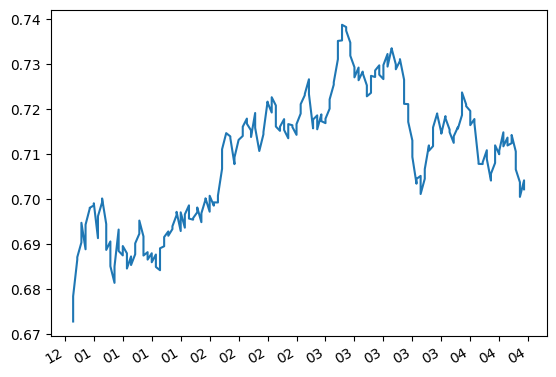

In [21]:
fig, ax = plt.subplots()
ax.plot(dfaudusdse['Date'], dfaudusdse['bid_open'])
fig.autofmt_xdate()
date_form = DateFormatter("%m")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
# axis[0,0].xlabel('Date (Month 1')
# axis[0,0].ylabel('Price (AUD-USD)')
# axis[0,0].title('AUD-USD Bid Open')


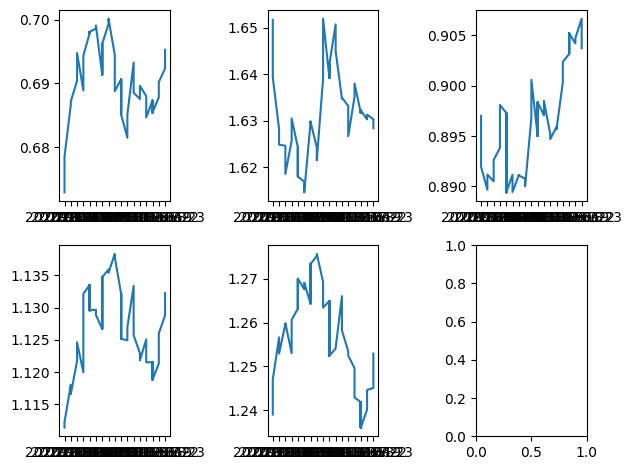

In [30]:
figure, axis = plt.subplots(2,3)

ax.plot(dfaudusdse['Date'], dfaudusdse['bid_open'])
fig.autofmt_xdate()
date_form = DateFormatter("%m")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))

ax.plot(dfeuraudse['Date'], dfeuraudse['bid_open'])
fig.autofmt_xdate()
date_form = DateFormatter("%m")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))

ax.plot(dfeurgbpse['Date'], dfeurgbpse['bid_open'])
fig.autofmt_xdate()
date_form = DateFormatter("%m")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))

ax.plot(dfeurusdse['Date'], dfeurusdse['bid_open'])
fig.autofmt_xdate()
date_form = DateFormatter("%m")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))

ax.plot(dfgbpusdse['Date'], dfgbpusdse['bid_open'])
fig.autofmt_xdate()
date_form = DateFormatter("%m")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))

figure.tight_layout()
plt.show()

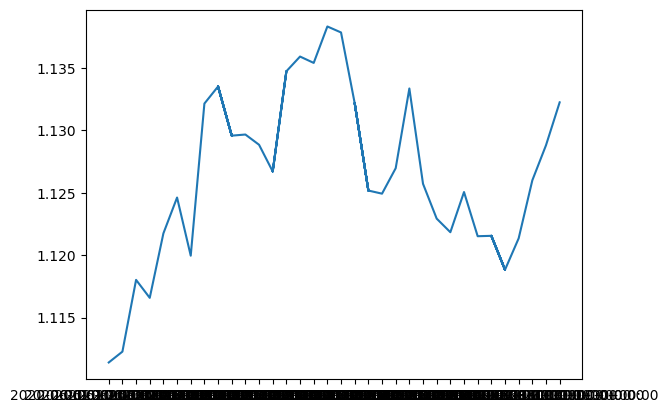

In [31]:
x = dfeurusdse['date']
y = dfeurusdse['bid_open']
plt.plot(x,y)
plt.show()

## Determine if stationary

In [32]:
x = dfaudusdse['bid_open']
y = dfaudusdse['ask_open']


In [102]:
##### CANDLESTICK CODE #####
import pandas as pd
from datetime import datetime

fig = go.Figure(data=[go.Candlestick(x=dfaudusdse['date'],
                open=dfaudusdse['bid_open'],
                high=dfaudusdse['bid_high'],
                low=dfaudusdse['bid_low'],
                close=dfaudusdse['bid_close'])])

fig.show()
##### Candlestick code #####

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

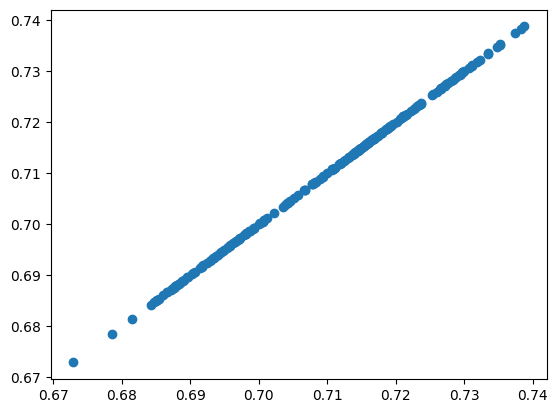

In [32]:
from matplotlib.pyplot import boxplot, scatter
from numpy import histogram

x = dfaudusdse['bid_open']
y = dfaudusdse['ask_open']
#histogram(x)
#boxplot(x)
scatter(x,y)

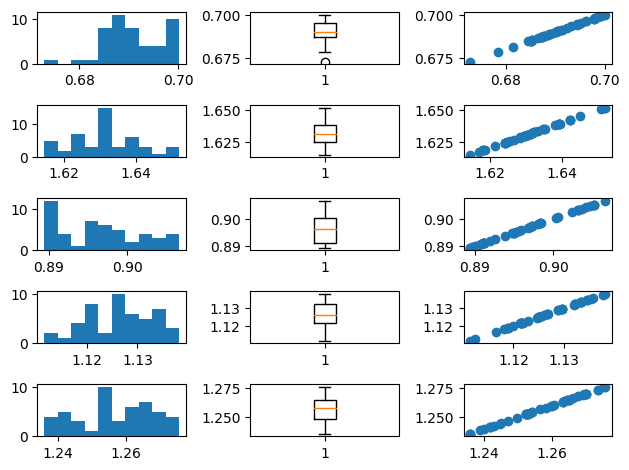

In [33]:
#rolling mean and std plot
#figure, axis = plt.subplots(nrows=3, ncols=3)
#ax0,ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9= axis.flatten()
from matplotlib.pyplot import boxplot, scatter

x = dfaudusdse['bid_open']
y = dfaudusdse['ask_open']
ax0.boxplot(x)
ax1.scatter(x,y)

x = dfeuraudse['bid_open']
y = dfeuraudse['ask_open']
ax2.boxplot(x)
ax3.scatter(x,y)

x = dfeurgbpse['bid_open']
y = dfeurgbpse['ask_open']
ax4.boxplot(x)
ax5.scatter(x,y)

x = dfeurusdse['bid_open']
y = dfeurusdse['ask_open']
ax6.boxplot(x)
ax7.scatter(x,y)

x = dfgbpusdse['bid_open']
y = dfgbpusdse['ask_open']
ax8.boxplot(x)
ax9.scatter(x,y)

figure.tight_layout()
plt.show()


In [33]:
df_open = dfaudusdse[['date', 'bid_open']]
df_open['date'] = pd.to_datetime(df_open['date'])
df_open = df_open.set_index(pd.DatetimeIndex(df_open['date']))
del df_open['date']
df_open.head()

C:\Users\Chris\AppData\Local\Temp\ipykernel_29996\1640748666.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_open['date'] = pd.to_datetime(df_open['date'])


,bid_open
date,
2020-06-01 10:00:00+00:00,0.67288
2020-06-01 16:00:00+00:00,0.67849
2020-06-02 10:00:00+00:00,0.68663
2020-06-02 16:00:00+00:00,0.68716
2020-06-03 10:00:00+00:00,0.69044


<AxesSubplot: xlabel='Lag', ylabel='Autocorrelation'>

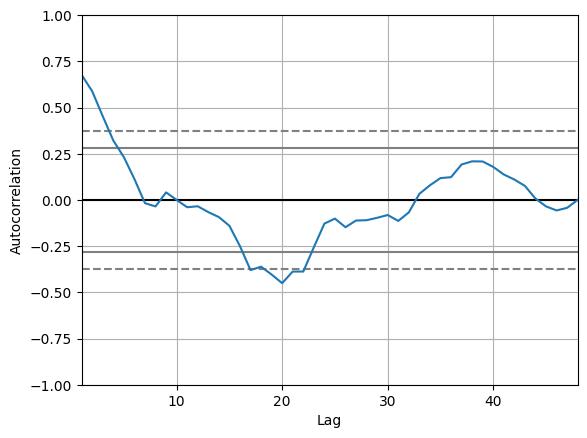

In [35]:
autocorrelation_plot(df_open)

In [36]:
dfeurusd_day = dfeurusd[dfeurusd['date'].str.contains('2020-06-01')]
dfeurusd_day.head()


,date,bid_open,bid_high,bid_low,bid_close,bid_volume,bid_average,bid_barCount,ask_open,ask_high,ask_low,ask_close,ask_volume,ask_average,ask_barCount,Date,Time,Useless
0,2020-06-01 00:00:00+00:00,1.11157,1.11158,1.11154,1.11154,-1,-1.0,-1,1.11158,1.11160,1.11155,1.11155,-1,-1.0,-1,2020-06-01,00:00:00,00:00
1,2020-06-01 00:00:01+00:00,1.11154,1.11157,1.11154,1.11155,-1,-1.0,-1,1.11155,1.11160,1.11155,1.11156,-1,-1.0,-1,2020-06-01,00:00:01,00:00
2,2020-06-01 00:00:02+00:00,1.11155,1.11155,1.11155,1.11155,-1,-1.0,-1,1.11156,1.11156,1.11156,1.11156,-1,-1.0,-1,2020-06-01,00:00:02,00:00
3,2020-06-01 00:00:03+00:00,1.11155,1.11155,1.11155,1.11155,-1,-1.0,-1,1.11156,1.11156,1.11156,1.11156,-1,-1.0,-1,2020-06-01,00:00:03,00:00
4,2020-06-01 00:00:04+00:00,1.11155,1.11155,1.11154,1.11155,-1,-1.0,-1,1.11156,1.11156,1.11156,1.11156,-1,-1.0,-1,2020-06-01,00:00:04,00:00


In [ ]:
# x = dfeurusd_day['date']
# y = dfeurusd_day['bid_open']
# plt.plot(x,y)
# plt.show()

In [ ]:
# df_openw = dfeurusd_day[['date', 'bid_open']]
# df_openw['date'] = pd.to_datetime(df_openw['date'])
# df_openw = df_open.set_index(pd.DatetimeIndex(df_openw['date']))
# del df_openw['date']
# df_openw.head()
# autocorrelation_plot(df_openw)

In [39]:
#correlation matrix
corr_audusd = dfaudusdse.corr()
corr_euraud = dfeuraudse.corr()
corr_eurgbp = dfeurgbpse.corr()
corr_eurusd = dfeurusdse.corr()
corr_gbpusd = dfgbpusdse.corr()

corr = {corr_audusd, corr_euraud, corr_eurgbp, corr_eurusd, corr_gbpusd}
corr

C:\Users\Chris\AppData\Local\Temp\ipykernel_29996\1261435275.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_audusd = dfaudusdse.corr()


NameError: name 'dfeuraudse' is not defined

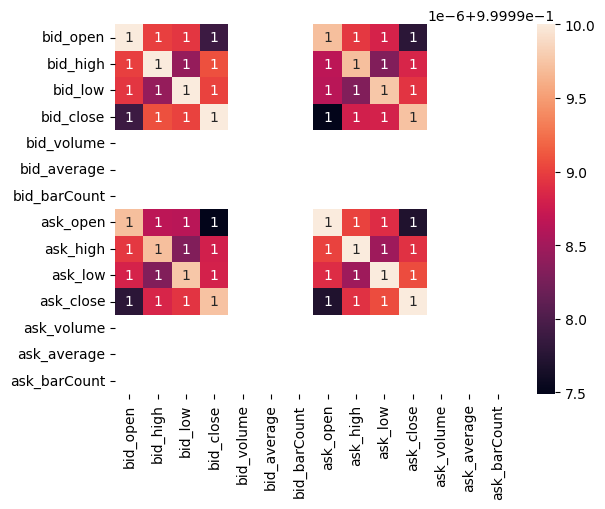

In [35]:
#heat map
sns.heatmap(corr, annot=True)
plt.show()

In [ ]:
dfaudusdses = dfaudusdse[['bid_open', 'bid_high', 'bid_low', 'bid_close', 'ask_open', 'ask_high', 'ask_low', 'ask_close']]
pd.plotting.scatter_matrix(dfs)

# dfeuraudses = dfeuraudse[['bid_open', 'bid_high', 'bid_low', 'bid_close', 'ask_open', 'ask_high', 'ask_low', 'ask_close']]
# pd.plotting.scatter_matrix(dfs)

# dfeurgbpses = dfeurgbpse[['bid_open', 'bid_high', 'bid_low', 'bid_close', 'ask_open', 'ask_high', 'ask_low', 'ask_close']]
# pd.plotting.scatter_matrix(dfs)

# dfeurusdses = dfeurusdse[['bid_open', 'bid_high', 'bid_low', 'bid_close', 'ask_open', 'ask_high', 'ask_low', 'ask_close']]
# pd.plotting.scatter_matrix(dfs)

# dfgbpusdses = dfgbpusdse[['bid_open', 'bid_high', 'bid_low', 'bid_close', 'ask_open', 'ask_high', 'ask_low', 'ask_close']]
# pd.plotting.scatter_matrix(dfs)

### Augmented Dickey Fuller test

In [38]:
def adfuller_test(data, field):
    print(f'Hypothesis test on {field}')
    print(f'H0: {field} is not stationary, H1: {field} is stationary')
    ADF_stat, p_val, lags, obs, crit, t = adfuller(data[field])
    print(f'ADF Statistic: {ADF_stat}')
    print(f'p-value: {p_val}')
    print(f'lags: {lags}')
    print(f'obs: {obs}')
    print(f'Critical Values: {crit}')
    print(f't: {t}')
    if p_val > 0.05:
        print('Conclusion: Do not reject H0, probably not stationary')
    else:
        print('Conclusion: Reject H0, Is stationary')
    # for key, value in result[4].items():
    #     print('\t{}: {}'.format(key, value))

In [39]:
adfuller_test(dfaudusdse, 'bid_open')

Hypothesis test on bid_open
H0: bid_open is not stationary, H1: bid_open is stationary
ADF Statistic: -2.942453160451172
p-value: 0.04062932508537931
lags: 1
obs: 46
Critical Values: {'1%': -3.5812576580093696, '5%': -2.9267849124681518, '10%': -2.6015409829867675}
t: -309.48122258523927
Conclusion: Reject H0, Is stationary


## ARIMA model 

In [ ]:
df_open = dft[['date', 'bid_open']]
df_open['date'] = pd.to_datetime(df_open['date'])
df_open = df_open.set_index(pd.DatetimeIndex(df_open['date']))
del df_open['date']
df_open.head()

In [ ]:
dfaudusd_bid['Open-Close'] = dfaudusd_bid['bid_open'] - dfaudusd_bid['bid_close'].shift(1)
dfaudusd_bid['Open-Open'] = dfaudusd_bid['bid_open'] - dfaudusd_bid['bid_open'].shift(1)

In [ ]:
rolling_mean = df_open.rolling(window=3).mean()
rolling_std = df_open.rolling(window = 3).std()

plt.plot(df_open, color='blue', label='Original')
plt.plot(rolling_mean, color = 'red', label='Rolling Mean')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()


In [ ]:
df_log = np.log(df_open)
rolling_mean = df_log.rolling(window = 5).mean()
rolling_std = df_log.rolling(window = 5).std()

plt.plot(df_log, color='blue', label='Original')
plt.plot(rolling_mean, color = 'red', label='Rolling Mean')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

In [ ]:
decomposition = seasonal_decompose(df_open) 
model = ARIMA(df_open, order=(1,1,1))
results = model.fit()#disp=-1
df_shift = df_open - df_open.shift()
plt.plot(df_shift)
plt.plot(results.fittedvalues, color='red')

## Supervised learning model

In [44]:
dfaudusdse.head()

,date,bid_open,bid_high,bid_low,bid_close,bid_volume,bid_average,bid_barCount,ask_open,ask_high,ask_low,ask_close,ask_volume,ask_average,ask_barCount,Date,Time,Useless
36000,2020-06-01 10:00:00+00:00,0.67288,0.67289,0.67288,0.67289,-1,-1.0,-1,0.67292,0.67292,0.67292,0.67292,-1,-1.0,-1,2020-06-01,10:00:00,00:00
57600,2020-06-01 16:00:00+00:00,0.67849,0.67849,0.67845,0.67847,-1,-1.0,-1,0.67850,0.67850,0.67846,0.67848,-1,-1.0,-1,2020-06-01,16:00:00,00:00
36000,2020-06-02 10:00:00+00:00,0.68663,0.68663,0.68662,0.68662,-1,-1.0,-1,0.68666,0.68666,0.68666,0.68666,-1,-1.0,-1,2020-06-02,10:00:00,00:00
57600,2020-06-02 16:00:00+00:00,0.68716,0.68717,0.68714,0.68717,-1,-1.0,-1,0.68718,0.68719,0.68716,0.68718,-1,-1.0,-1,2020-06-02,16:00:00,00:00
36000,2020-06-03 10:00:00+00:00,0.69044,0.69052,0.69044,0.69051,-1,-1.0,-1,0.69047,0.69053,0.69047,0.69053,-1,-1.0,-1,2020-06-03,10:00:00,00:00


In [59]:
hr_interval_df.head()

,date,bid_open,bid_high,bid_low,bid_close,bid_volume,bid_average,bid_barCount,ask_open,ask_high,ask_low,ask_close,ask_volume,ask_average,ask_barCount,Date,Time,Useless
0,2020-06-01 00:00:00+00:00,0.66582,0.66583,0.66581,0.66582,-1,-1.0,-1,0.66584,0.66586,0.66584,0.66586,-1,-1.0,-1,2020-06-01,00:00:00,00:00
3600,2020-06-01 01:00:00+00:00,0.66897,0.66898,0.66880,0.66880,-1,-1.0,-1,0.66902,0.66902,0.66883,0.66883,-1,-1.0,-1,2020-06-01,01:00:00,00:00
7200,2020-06-01 02:00:00+00:00,0.67251,0.67253,0.67251,0.67253,-1,-1.0,-1,0.67255,0.67255,0.67253,0.67255,-1,-1.0,-1,2020-06-01,02:00:00,00:00
10800,2020-06-01 03:00:00+00:00,0.67355,0.67357,0.67352,0.67353,-1,-1.0,-1,0.67357,0.67358,0.67356,0.67357,-1,-1.0,-1,2020-06-01,03:00:00,00:00
14400,2020-06-01 04:00:00+00:00,0.67192,0.67199,0.67192,0.67199,-1,-1.0,-1,0.67195,0.67200,0.67195,0.67200,-1,-1.0,-1,2020-06-01,04:00:00,00:00


In [60]:
# stepwise backward model --- all variables --- determine which features are most important:
dfaudusd_bid = hr_interval_df[['date', 'bid_open', 'bid_high', 'bid_low', 'bid_close', 'bid_volume']]
dfaudusd_bid = dfaudusd_bid.set_index(['date'])
dfaudusd_bid.head()

,bid_open,bid_high,bid_low,bid_close,bid_volume
date,,,,,
2020-06-01 00:00:00+00:00,0.66582,0.66583,0.66581,0.66582,-1
2020-06-01 01:00:00+00:00,0.66897,0.66898,0.66880,0.66880,-1
2020-06-01 02:00:00+00:00,0.67251,0.67253,0.67251,0.67253,-1
2020-06-01 03:00:00+00:00,0.67355,0.67357,0.67352,0.67353,-1
2020-06-01 04:00:00+00:00,0.67192,0.67199,0.67192,0.67199,-1


In [61]:
#getting the difference between open today and yesterday and the close to the open price
#moving average of 5
#consider an expoential moving average


dfaudusd_bid['S_5'] = dfaudusd_bid['bid_close'].rolling(window=5).mean()
dfaudusd_bid['corr'] = dfaudusd_bid['bid_close'].rolling(window=5).corr(dfaudusd_bid['S_5'])
dfaudusd_bid['RSI'] = ta.RSI(np.array(dfaudusd_bid['bid_close']), timeperiod =5)
dfaudusd_bid['Open-Close'] = dfaudusd_bid['bid_open'] - dfaudusd_bid['bid_close'].shift(1)
dfaudusd_bid['Open-Open'] = dfaudusd_bid['bid_open'] - dfaudusd_bid['bid_open'].shift(1)
dfaudusd_bid =dfaudusd_bid.dropna()
X=dfaudusd_bid.iloc[:,:10]
X.head()

,bid_open,bid_high,bid_low,bid_close,bid_volume,S_5,corr,RSI,Open-Close,Open-Open
date,,,,,,,,,,
2020-06-01 08:00:00+00:00,0.67700,0.67702,0.67700,0.67700,-1,0.674090,0.939811,90.998676,0.00199,0.00208
2020-06-01 09:00:00+00:00,0.67366,0.67366,0.67362,0.67365,-1,0.674422,0.615971,61.566837,-0.00334,-0.00334
2020-06-01 10:00:00+00:00,0.67288,0.67289,0.67288,0.67289,-1,0.674522,-0.177556,56.394380,-0.00077,-0.00078
2020-06-01 11:00:00+00:00,0.67254,0.67258,0.67254,0.67256,-1,0.674222,-0.474930,53.934970,-0.00035,-0.00034
2020-06-01 12:00:00+00:00,0.67371,0.67371,0.67370,0.67370,-1,0.673960,-0.437878,61.235158,0.00115,0.00117


In [62]:
y = np.where(dfaudusd_bid['bid_close'].shift(-1) > dfaudusd_bid['bid_close'], 1,-1)

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [84]:
model = LogisticRegression().fit(X_train, y_train)

In [85]:
model.coef_

array([[-0.16772267, -0.16741634, -0.1682115 , -0.16795351, -0.35777782,
        -0.1455274 , -0.0289735 , -0.00087645, -0.03326214, -0.03362457]])

In [86]:
probability = model.predict_proba(X_test)
probability

array([[0.4670742 , 0.5329258 ],
       [0.46973592, 0.53026408],
       [0.47683902, 0.52316098],
       [0.47858205, 0.52141795],
       [0.47645174, 0.52354826],
       [0.47570263, 0.52429737],
       [0.47836083, 0.52163917],
       [0.47963615, 0.52036385],
       [0.4747392 , 0.5252608 ],
       [0.46885448, 0.53114552],
       [0.47175605, 0.52824395],
       [0.47190212, 0.52809788],
       [0.4793115 , 0.5206885 ],
       [0.47398689, 0.52601311],
       [0.46558699, 0.53441301],
       [0.46430874, 0.53569126],
       [0.46279172, 0.53720828],
       [0.46723081, 0.53276919],
       [0.46747428, 0.53252572],
       [0.4695509 , 0.5304491 ],
       [0.4722022 , 0.5277978 ],
       [0.46936546, 0.53063454],
       [0.46926331, 0.53073669],
       [0.46580909, 0.53419091],
       [0.46802878, 0.53197122],
       [0.46776411, 0.53223589],
       [0.46648159, 0.53351841],
       [0.46603701, 0.53396299],
       [0.46407213, 0.53592787],
       [0.46564745, 0.53435255],
       [0.

In [87]:
predict_values = model.predict(X_test)

In [91]:
#https://towardsdatascience.com/random-forest-in-python-24d0893d51c0
rX_train, rX_test, ry_train, ry_test = train_test_split(X, y, test_size=0.2, shuffle=False)
rf = RandomForestRegressor(n_estimators = 1000)

rf.fit(rX_train, ry_train)

RandomForestRegressor(n_estimators=1000)

In [95]:
fr_predictvals = rf.predict(rX_test)

In [96]:
# Absolute Mean Error
errors = abs(fr_predictvals - ry_test)
print(round(np.mean(errors), 2))

0.99


In [ ]:
#

## Model Evaluation -- phase 

In [88]:
print(metrics.confusion_matrix(y_test, predict_values))
tn, fp, fn, tp = metrics.confusion_matrix(y_test, predict_values).ravel()
print(f'tn:{tn}, fp:{fp}, fn:{fn}, tp:{tp}')

[[  0 251]
 [  0 245]]
tn:0, fp:251, fn:0, tp:245


In [89]:
metrics.classification_report(y_test, predict_values)

c:\Users\Chris\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Chris\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Chris\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

'              precision    recall  f1-score   support\n\n          -1       0.00      0.00      0.00       251\n           1       0.49      1.00      0.66       245\n\n    accuracy                           0.49       496\n   macro avg       0.25      0.50      0.33       496\nweighted avg       0.24      0.49      0.33       496\n'

In [90]:
print(model.score(X_test, y_test))

0.4939516129032258


#### Performance for Random Forest

In [97]:
metrics.confusion_matrix(ry_test, fr_predictvals)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [100]:
print(metrics.classification_report(ry_test, fr_predictvals))

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [ ]:
MAPE = 100*(errors/ry_test)
accuracy = 100 - abs(np.mean(MAPE))
print(accuracy)

90.4891129032258


## Trading strategy

In [89]:
split = int(0.7*len(dfaudusd_bid))
dfaudusd_bid['predict_signals'] = model.predict()
dfaudusd_bid['Nifty_returns']  = np.log(dfaudusd_bid['Close']/dfaudusd_bid['Close'].shift(1))
Cumulative_Nifty_returns = np.cumsum(dfaudusd_bid[split:]['Strategy_returns'])

dfaudusd_bid['Startegy_returns'] = dfaudusd_bid['Nifty_returns']* dfaudusd_bid['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = np.cumsum(dfaudusd_bid[split:]['Startegy_returns'])

plt.figure(figsize=(10,5))
plt.plot(Cumulative_Nifty_returns, color='r',label = 'Nifty Returns')
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
plt.legend()
plt.show()

TypeError: LinearClassifierMixin.predict() missing 1 required positional argument: 'X'